## Лабораторная работа 6. Жадная стратегия и динамическое программирование
by Константин Киселев, МОА-211

### Задание 1
Предположим, что вы собираетесь в турпоход. У вас есть рюкзак, емкость которого
составляет 6 фунтов, и список предметов, которые вы можете положить с собой в рюкзак.
У каждого предмета есть вес и ценность. Чем выше ценность, тем важнее для вас предмет.

Нарисуйте и вручную заполните таблицу, которая даст оптимальный набор предметов для
похода и общую ценность получившегося рюкзака. Ориентируйтесь на алгоритм
динамического программирования, описанный в лекции.

Список предметов возьмите согласно вашему варианту.

Вариант 3.
1. вода, 2 фунта, 8;
2. книга, 2 фунта, 5;
3. еда, 3 фунта, 7;
4. куртка, 1 фунт, 3;
5. камера, 2 фунта, 4 

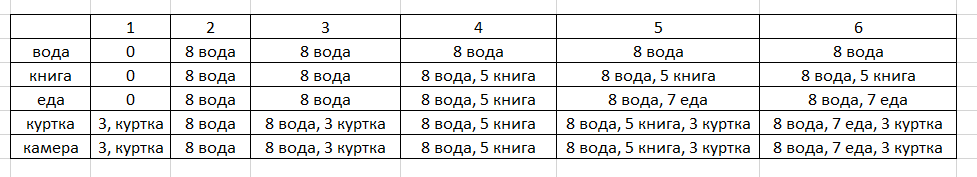

### Задание 2
Напишите программу, которая моделирует задачу о рюкзаке. Пользователь вводит объем
рюкзака и список предметов с указанием их веса и ценности. Вам необходимо подобрать
набор предметов максимальной ценности, которые поместятся в рюкзаке. Реализуйте три
варианта решения этой задачи:
1. Полный перебор
2. Жадный алгоритм
3. Динамическое программирование

Укажите вычислительная сложность (в O-нотации) для каждого алгоритма. Постройте
графики возрастания времени выполнения алгоритмов при увеличении входных данных.

Приведите примеры входных данных, когда жадный алгоритм дает оптимальное решение
и когда дает неоптимальное решение.

In [13]:
import matplotlib.pyplot as plt
import timeit
import random
import string

Решение полным перебором: ['вода', 'еда', 'куртка']
Решение жадным алгоритмом: ['вода', 'еда', 'куртка']
Решение динамическим программированием: ['вода', 'еда', 'куртка']
[9.000010322779417e-06, 7.199996616691351e-06, 1.1299998732283711e-05, 9.700001101009548e-06, 9.69998654909432e-06, 1.200000406242907e-05, 7.400012691505253e-06, 9.799987310543656e-06, 1.030000566970557e-05, 9.700001101009548e-06, 8.999995770864189e-06]


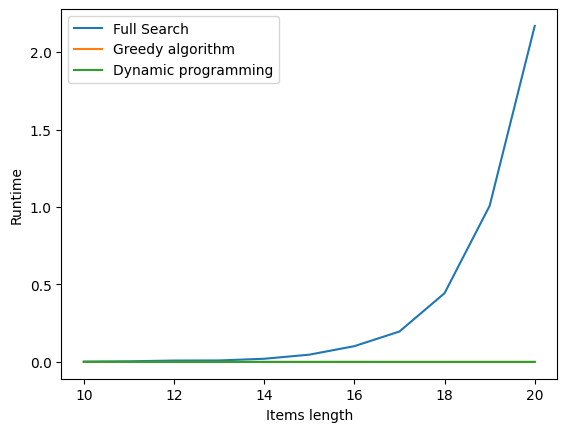

In [22]:
def full(vol: int, items: list) -> list:
    n = len(items)
    max_value = 0
    best_combination = []

    # Генерируем все возможные комбинации предметов
    for i in range(2**n):
        combination = []
        total_weight = 0
        total_value = 0

        # Проверяем каждый бит в двоичном представлении числа i
        for j in range(n):
            if (i >> j) & 1:
                combination.append(items[j][0])
                total_weight += items[j][1]
                total_value += items[j][2]

        # Проверяем, помещается ли комбинация предметов в рюкзак
        if total_weight <= vol and total_value > max_value:
            max_value = total_value
            best_combination = combination

    return best_combination



# Жадный алгоритм даёт оптимальное решение, когда самые дорогие предметы имеют оправданный вес по сравнению с предметами той же ценности,
# и наоборот, даёт неоптимальное решение, когда взять несколько более дешёвых предметов было бы выгоднее одного самого дорогого

def greedy(vol: int, items: list) -> list:
    # Сортируем предметы в порядке убывания стоимости

    sorted_items = sorted(items, key=lambda x: x[2], reverse=True)

    selected_items = []

    for item in sorted_items:
        # Забираем самые дорогие

        if vol > 0 and vol - item[1] >= 0:
            vol -= item[1]

            selected_items.append(item[0])

        else:
            # Если самый дорогой не помещается, пробуем следующий

            continue

    return selected_items


def dynamic(vol: int, items: list) -> list:
    num_items = len(items)
    # Создаем двумерный массив размером (количество предметов + 1) x (вес рюкзака + 1),
    # чтобы хранить значения оптимальной стоимости для разных подзадач
    dp = [[0] * (vol + 1) for _ in range(num_items + 1)]

    for i in range(1, num_items + 1):
        name, weight, value = items[i - 1]
        for j in range(1, vol + 1):
            # Если текущий предмет может поместиться в рюкзак,
            # то сравниваем стоимость с предыдущей подзадачей без этого предмета
            if weight <= j:
                dp[i][j] = max(dp[i - 1][j], dp[i - 1][j - weight] + value)
            else:
                # Если предмет не помещается, то берем стоимость предыдущей подзадачи
                dp[i][j] = dp[i - 1][j]

    # Восстанавливаем список названий помещающихся предметов, начиная с последнего предмета
    result = []
    i = num_items
    j = vol
    while i > 0 and j > 0:
        if dp[i][j] != dp[i - 1][j]:
            name, weight, value = items[i - 1]
            result.append(name)
            j -= weight
        i -= 1

    return result[::-1]



vol = 6

items = [
    ("вода", 2, 8),
    ("книга", 2, 5),
    ("еда", 3, 7),

    ("куртка", 1, 3),
    ("камера", 2, 4),

]


print(f"Решение полным перебором: {full(vol, items)}")


print(f"Решение жадным алгоритмом: {greedy(vol, items)}")


print(f"Решение динамическим программированием: {dynamic(vol, items)}")

plt_x = []
plt_search = []
plt_greedy = []
plt_dynamic = []
time_search = timeit.Timer("full(v, items)", globals=globals())
time_greedy = timeit.Timer("greedy(v, items)", globals=globals())
time_dynamic = timeit.Timer("dynamic(v, items)", globals=globals())

for i in range(10, 21):
    plt_x.append(i)
    v = random.randint(1, 100)
    items = [
        (
            "".join(random.choice(string.ascii_lowercase) for m in range(v)),
            random.randint(1, 10),
            random.randint(1, 20),
        )
        for j in range(i)
    ]

    time1 = time_search.timeit(number=1)
    plt_search.append(time1)

    time2 = time_greedy.timeit(number=1)
    plt_greedy.append(time2)

    time3 = time_dynamic.timeit(number=1)
    plt_dynamic.append(time3)

print(plt_greedy)

plt.plot(plt_x, plt_search, label="Full Search")
plt.plot(plt_x, plt_greedy, label="Greedy algorithm")
plt.plot(plt_x, plt_dynamic, label="Dynamic programming")
plt.xlabel("Items length")
plt.ylabel("Runtime")
plt.legend()
plt.show()

### Задание 3
Нарисуйте и вручную заполните таблицу для вычисления самой длинной общей подстроки
между строками blue и clue. Ориентируйтесь на алгоритм динамического
программирования, описанный в лекции.


### Задание 4
Напишите программу, реализующую алгоритм нахождения самой длинной общей подстроки из лекции. Пользователь вводит слово с ошибкой и далее список похожих слов. Ваша программа должна вывести самое похожее слово согласно данному алгоритму.

In [1]:
def longest_common_substring(s1, s2):
    m = len(s1)
    n = len(s2)
    max_length = 0
    end_index = 0
    
    # Создаем матрицу размером (m+1) x (n+1) и заполняем ее нулями
    matrix = [[0] * (n+1) for _ in range(m+1)]
    
    for i in range(1, m+1):
        for j in range(1, n+1):
            # Если символы совпадают
            if s1[i-1] == s2[j-1]:
                matrix[i][j] = matrix[i-1][j-1] + 1
                # Если новая подстрока длиннее предыдущей
                if matrix[i][j] > max_length:
                    max_length = matrix[i][j]
                    end_index = i
    
    # Возвращаем найденную подстроку
    return s1[end_index - max_length : end_index]


def find_most_similar_word(word, word_list):
    max_length = 0
    most_similar_word = ""
    
    # Ищем самую длинную общую подстроку среди слов из списка
    for test_word in word_list:
        common_substring = longest_common_substring(word, test_word)
        if len(common_substring) > max_length:
            max_length = len(common_substring)
            most_similar_word = test_word
    
    return most_similar_word


# Ввод данных пользователем
word_with_error = input("Введите слово с ошибкой: ")
similar_word_list = input("Введите список похожих слов через запятую: ").split(", ")

# Находим самое похожее слово
most_similar_word = find_most_similar_word(word_with_error, similar_word_list)

# Вывод результата
print("Самое похожее слово:", most_similar_word)

Самое похожее слово: house


### Задание 5
Напишите программу, реализующую алгоритм нахождения самой длинной общей подпоследовательности из лекции. Пользователь вводит слово с ошибкой и далее  список похожих слов. Ваша программа должна вывести самое похожее слово согласно данному алгоритму.


### Задание 6
Имеется n предметов различных размеров (от 0.1 до 1.0). Есть неограниченное количество
одинаковых ящиков вместимостью 1.0. Необходимо разложить все n предметов в
минимальное количество ящиков.

Напишите программу, реализующую 4 жадных стратегии раскладки предметов по ящикам:
1. Первый подходящий ящик. Ящики просматриваются поочередно пока не найдется
ящик, в котором достаточно свободного места для упаковки очередного предмета.
Если такого ящика нет, то предмет кладется в новый ящик.
Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5)
пройдет следующим образом: первый ящик — [0.5, 0.3, 0.1], второй — [0.7, 0.2],
третий — [0.9], четвертый — [0.6, 0.4], пятый — [0.8], шестой — [0.5]. Т.е. ответом
будет 6 ящиков.
2. Наиболее подходящий ящик. Выбирается ящик, в котором останется как можно
меньше места после помещения туда очередного предмета. Укладка в новый ящик
применяется только в том случае, если очередной предмет не помещается ни в какой
из имеющихся ящиков.
Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5)
пройдет следующим образом: первый ящик — [0.5, 0.5], второй — [0.7, 0.3], третий
— [0.9, 0.1], четвертый — [0.6, 0.4], пятый — [0.8, 0.2]. Т.е. ответом будет 5 ящиков.
3. Следующий подходящий ящик. Мы продолжаем укладку каждого ящика до тех пор,
пока очередной предмет в него помещается. Если предмет не влезает в ящик, то мы
берем новый ящик, а к ранее уложенным ящикам уже не возвращаемся.
Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5)
пройдет следующим образом: первый ящик — [0.5], второй — [0.7, 0.3], третий —
[0.9], четвертый — [0.6], пятый — [0.8, 0.1], шестой — [0.4, 0.2], седьмой — [0.5].
Т.е. ответом будет 7 ящиков.
4. Наименее подходящий ящик. Выбирается ящик, в котором останется как можно
больше места после помещения туда очередного предмета. Укладка в новый ящик
применяется только в том случае, если очередной предмет не помещается ни в какой
из имеющихся ящиков.
Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5)
пройдет следующим образом: первый ящик — [0.5, 0.3], второй — [0.7], третий —
[0.9], четвертый — [0.6, 0.1], пятый — [0.8], шестой — [0.4, 0.2], седьмой — [0.5].
Т.е. ответом будет 7 ящиков.
Сгенерируйте случайные наборы предметов (размером от 0.1 до 0.9) в количестве 50, 100,
200 и 500. Осуществите на каждом из наборов проверку всех четырех стратегий и
посмотрите, какая из них приводит к меньшему числу ящиков.
В отчете приведите ваши результаты в виде таблицы.

### Задание 7
Есть купюры и монеты номиналами: 1, 3, 4, 10, 50, 100. В банкомате неограниченное
количество купюр и монет каждого номинала. Мы хотим снять со счета n рублей. Нужно
вывести на экран минимальный набор купюр и монет, который может выдать банкомат,
чтобы сумма получилась ровно n.
1. Напишите жадный алгоритм решения задачи. Подсказка: выбирайте купюры и
монеты по убыванию номинала.
2. Используйте динамическое программирование, чтобы рассчитать минимальное
количество требуемых купюр и монет.
3. Приведите пример входных данных, когда жадный алгоритм выдает не оптимальное
решение.

### Задание 8
Напишите программу, моделирующую работу клиентов с банкоматом. В банкомате есть
купюры и монеты номиналами: 1, 3, 4, 10, 50, 100, но, в отличие от предыдущей задачи, их
количество конечно.
В начале работы программы вы задаете:
* количество клиентов
* для каждого клиента количество рублей, которые он хочет снять (считаем, что эта сумма всегда корректна и имеется на счету клиента)
* изначальное количество купюр и монет в банкомате

Далее вы по очереди обрабатываете запросы клиентов. Для каждого клиента выведите на
экран минимальный набор купюр и монет для его суммы или сообщение о невозможности
предоставить данную суммы из-за нехватки купюр и монет. Если минимальный набор
найден успешно, то вычтите его из запасов банкомата и выведите на экран получившейся
остаток.

Проведите несколько запусков программы с разными начальными данными и различными
исходами работы с банкоматом.